In [89]:
import nltk
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Bidirectional, BatchNormalization
import glob
import tarfile
import os
from six.moves import urllib
import re

In [90]:
def fetch_movie_review_data():
    # URL to download the file from
    url = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'
    
    # Destination directory to save the downloaded file and extract its contents
    data_dir = './data/'
    
    # Create the 'data' directory if it does not exist
    os.makedirs(data_dir, exist_ok=True)

    # File path for saving the downloaded tar.gz file
    file_path = os.path.join(data_dir, 'aclImdb_v1.tar.gz')

    # Downloading the file using urllib
    urllib.request.urlretrieve(url, file_path)

    # Extracting the contents
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=data_dir)

    # Close the tarfile object
    tar.close()

    # Remove the downloaded tar.gz file
    os.remove(file_path)



In [93]:
fetch_movie_review_data()

In [94]:
import os

data_dir = './data/'

# List all files and directories in the extracted directory
contents = os.listdir(data_dir)
print(contents)


['.DS_Store', 'aclImdb']


In [95]:
import os
import numpy as np

data_dir = './data/aclImdb/'
names = ['neg', 'pos']

def loading_texts(path, folders):
    texts, labels = [], []
    for idx, label in enumerate(folders):
        folder_path = os.path.join(path, label)
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r') as file:
                texts.append(file.read())
            labels.append(idx)

    return texts, np.array(labels).astype(np.int64)

x_train, y_train =loading_texts(os.path.join(data_dir, 'train'), names)
x_test, y_test = loading_texts(os.path.join(data_dir, 'test'), names)


In [6]:
'''
# More Potent way of getting the DATA

from pathlib import Path
import numpy as np

data_dir = Path('./data2/aclImdb/')
names = ['neg', 'pos']

def load_texts_labels_from_folders(path, folders):
    texts_labels = [(file.read_text(), idx) 
                    for idx, label in enumerate(folders) 
                    for file in (path / label).glob('*.*')]
    texts, labels = zip(*texts_labels)
    return list(texts), np.array(labels).astype(np.int64)

x_train, y_train = load_texts_labels_from_folders(data_dir / 'train', names)
x_test, y_test = load_texts_labels_from_folders(data_dir / 'test', names)

'''


In [96]:
x_train[1]

'Well...tremors I, the original started off in 1990 and i found the movie quite enjoyable to watch. however, they proceeded to make tremors II and III. Trust me, those movies started going downhill right after they finished the first one, i mean, ass blasters??? Now, only God himself is capable of answering the question "why in Gods name would they create another one of these dumpster dives of a movie?" Tremors IV cannot be considered a bad movie, in fact it cannot be even considered an epitome of a bad movie, for it lives up to more than that. As i attempted to sit though it, i noticed that my eyes started to bleed, and i hoped profusely that the little girl from the ring would crawl through the TV and kill me. did they really think that dressing the people who had stared in the other movies up as though they we\'re from the wild west would make the movie (with the exact same occurrences) any better? honestly, i would never suggest buying this movie, i mean, there are cheaper ways to 

In [97]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [98]:
x_test[1]

'I have seen this movie and I did not care for this movie anyhow. I would not think about going to Paris because I do not like this country and its national capital. I do not like to learn french anyhow because I do not understand their language. Why would I go to France when I rather go to Germany or the United Kingdom? Germany and the United Kingdom are the nations I tolerate. Apparently the Olsen Twins do not understand the French language just like me. Therefore I will not bother the France trip no matter what. I might as well stick to the United Kingdom and meet single women and play video games if there is a video arcade. That is all.'

In [55]:
import re

# Preprocessing text

REPLACE_REGEX = re.compile(r"[.;:!\'?,\"()\[\]]|(<br\s*/><br\s*/>)|(\-)|(\/)")
#REPLACE_REGEX = re.compile(r"[;:!\'?\"()\[\]]|(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_REGEX.sub(" ", line.lower()) for line in reviews]
    return reviews

processed_train = preprocess_reviews(x_train)
processed_test = preprocess_reviews(x_test)


In [65]:
processed_train[1]

'well   tremors i  the original started off in 1990 and i found the movie quite enjoyable to watch  however  they proceeded to make tremors ii and iii  trust me  those movies started going downhill right after they finished the first one  i mean  ass blasters    now  only god himself is capable of answering the question  why in gods name would they create another one of these dumpster dives of a movie   tremors iv cannot be considered a bad movie  in fact it cannot be even considered an epitome of a bad movie  for it lives up to more than that  as i attempted to sit though it  i noticed that my eyes started to bleed  and i hoped profusely that the little girl from the ring would crawl through the tv and kill me  did they really think that dressing the people who had stared in the other movies up as though they we re from the wild west would make the movie  with the exact same occurrences  any better  honestly  i would never suggest buying this movie  i mean  there are cheaper ways to f

In [66]:
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))


def remove_stop_words(corpus):
    removed_stop_words = [' '.join([word for word in review.split() if word not in english_stop_words])
                         for review in corpus]
    return removed_stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abdulraqeeb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
no_stop_words_train = remove_stop_words(processed_train)

In [68]:
no_stop_words_train[1]

'well tremors original started 1990 found movie quite enjoyable watch however proceeded make tremors ii iii trust movies started going downhill right finished first one mean ass blasters god capable answering question gods name would create another one dumpster dives movie tremors iv cannot considered bad movie fact cannot even considered epitome bad movie lives attempted sit though noticed eyes started bleed hoped profusely little girl ring would crawl tv kill really think dressing people stared movies though wild west would make movie exact occurrences better honestly would never suggest buying movie mean cheaper ways find things burn well'

In [69]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [70]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

def lemmatized_operation(corpus):
    lemmatizer = WordNetLemmatizer()
    lemmatized_reviews = [' '.join(lemmatizer.lemmatize(word) for word in nltk.word_tokenize(review)) for review in corpus]
    return lemmatized_reviews

lemmatized_reviews = lemmatized_operation(no_stop_words_train)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abdulraqeeb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abdulraqeeb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [71]:
lemmatized_reviews[1]

'well tremor original started 1990 found movie quite enjoyable watch however proceeded make tremor ii iii trust movie started going downhill right finished first one mean as blaster god capable answering question god name would create another one dumpster dive movie tremor iv can not considered bad movie fact can not even considered epitome bad movie life attempted sit though noticed eye started bleed hoped profusely little girl ring would crawl tv kill really think dressing people stared movie though wild west would make movie exact occurrence better honestly would never suggest buying movie mean cheaper way find thing burn well'

In [81]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set a random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Rest of the code remains the same as before

# Tokenization and Padding
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(lemmatized_reviews)

vocab_size = len(tokenizer.word_index) + 1
sequences_train = tokenizer.texts_to_sequences(lemmatized_reviews)
sequences_test = tokenizer.texts_to_sequences(preprocess_reviews(x_test))

# Set a smaller max sequence length to optimize training
max_sequence_length = 100

padded_train = pad_sequences(sequences_train, maxlen=max_sequence_length, padding='post')
padded_test = pad_sequences(sequences_test, maxlen=max_sequence_length, padding='post')

# Building the Optimized Neural Network
model = Sequential()
model.add(Embedding(vocab_size, 16))  # Increasing embedding dimension for more expressiveness
model.add(Dropout(0.3))  # Increasing dropout rate for more regularization
model.add(Bidirectional(LSTM(32)))  # Using bidirectional LSTM for better capture of dependencies
model.add(Dropout(0.3))  # Increasing dropout rate for more regularization
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())  # Adding batch normalization for improved stability
model.add(Dropout(0.3))  # Increasing dropout rate for more regularization
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Splitting the data into training and validation sets
x_train_partial, x_val, y_train_partial, y_val = train_test_split(padded_train, y_train, test_size=0.2, random_state=42)

# Training the Model without early stopping and with validation data for 10 epochs
history = model.fit(x_train_partial, y_train_partial, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# Evaluation on the test set
#loss, accuracy = model.evaluate(padded_test, y_test)
#print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy * 100:.2f}%')


Epoch 1/10
625/625 [==============================] - 53s 79ms/step - loss: 0.4347 - accuracy: 0.7860 - val_loss: 0.3315 - val_accuracy: 0.8636
Epoch 2/10
625/625 [==============================] - 41s 65ms/step - loss: 0.1911 - accuracy: 0.9269 - val_loss: 0.3547 - val_accuracy: 0.8506
Epoch 3/10
625/625 [==============================] - 41s 66ms/step - loss: 0.1059 - accuracy: 0.9636 - val_loss: 0.3604 - val_accuracy: 0.8530
Epoch 4/10
625/625 [==============================] - 513s 822ms/step - loss: 0.0730 - accuracy: 0.9735 - val_loss: 0.4837 - val_accuracy: 0.8566
Epoch 5/10
625/625 [==============================] - 40s 65ms/step - loss: 0.0494 - accuracy: 0.9829 - val_loss: 0.4785 - val_accuracy: 0.8640
Epoch 6/10
625/625 [==============================] - 41s 66ms/step - loss: 0.0344 - accuracy: 0.9886 - val_loss: 0.5990 - val_accuracy: 0.8548
Epoch 7/10
625/625 [==============================] - 41s 66ms/step - loss: 0.0287 - accuracy: 0.9898 - val_loss: 0.5704 - val_accurac

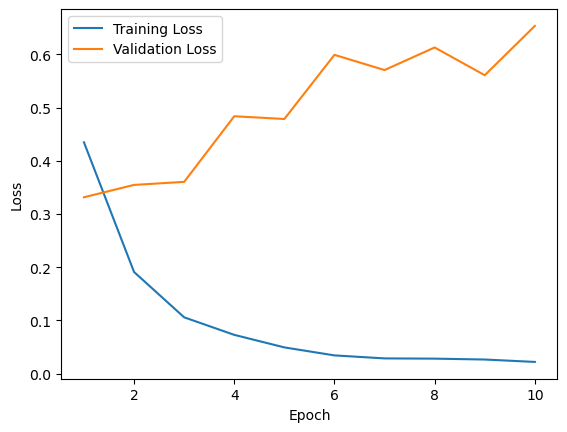

In [82]:
import matplotlib.pyplot as plt
epoch_nums = range(1, len(history.history['loss']) + 1)
plt.plot(epoch_nums, history.history['loss'], label='Training Loss')
plt.plot(epoch_nums, history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

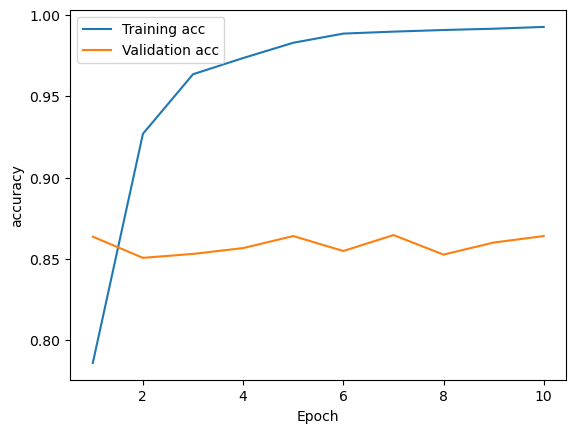

In [84]:
import matplotlib.pyplot as plt
epoch_nums = range(1, len(history.history['loss']) + 1)
plt.plot(epoch_nums, history.history['accuracy'], label='Training acc')
plt.plot(epoch_nums, history.history['val_accuracy'], label='Validation acc')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [85]:
if not os.path.exists('models'):
    os.makedirs('models')

# Save the trained model inside the 'models' directory
model.save('models/20988627_21051268_21049384_NLP.h5')

# Printing a message to indicate that the model is saved
print("Model saved successfully.")

Model saved successfully.


In [88]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 16)          1081456   
                                                                 
 dropout_31 (Dropout)        (None, None, 16)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dropout_32 (Dropout)        (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                       